In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [56]:
df.shape

(962, 2)

In [57]:
# number of job roles
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [58]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# Exploring the job roles

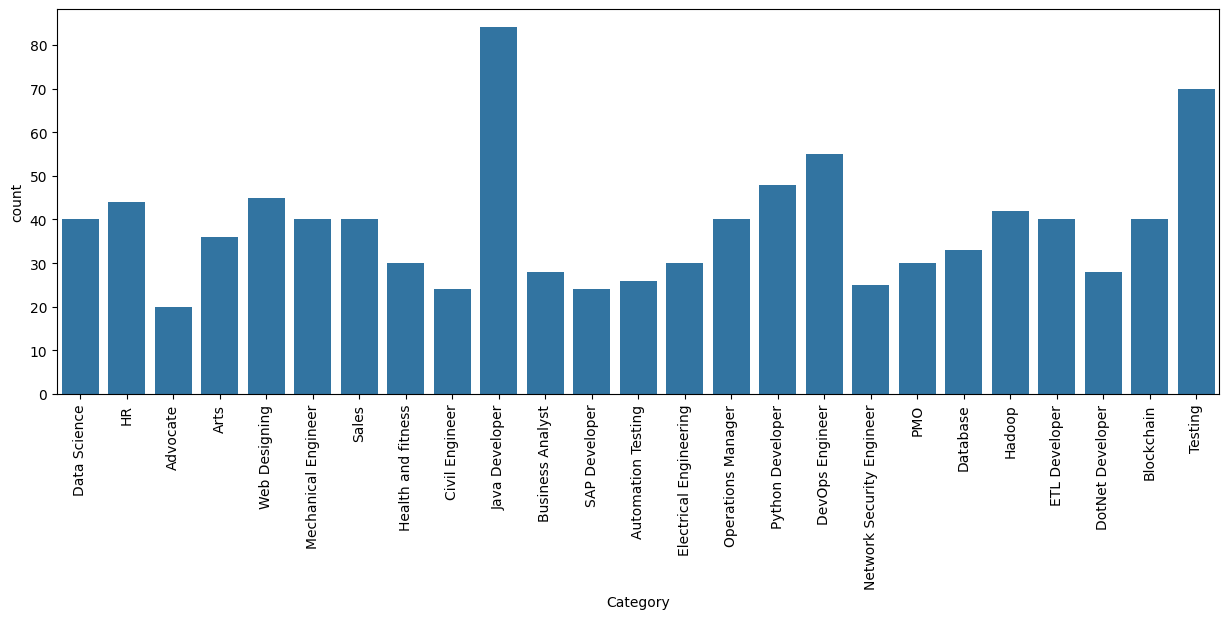

In [59]:
# count plot
plt.figure(figsize=(15,5))
sns.countplot(x=df["Category"])
plt.xticks(rotation=90)
plt.show()

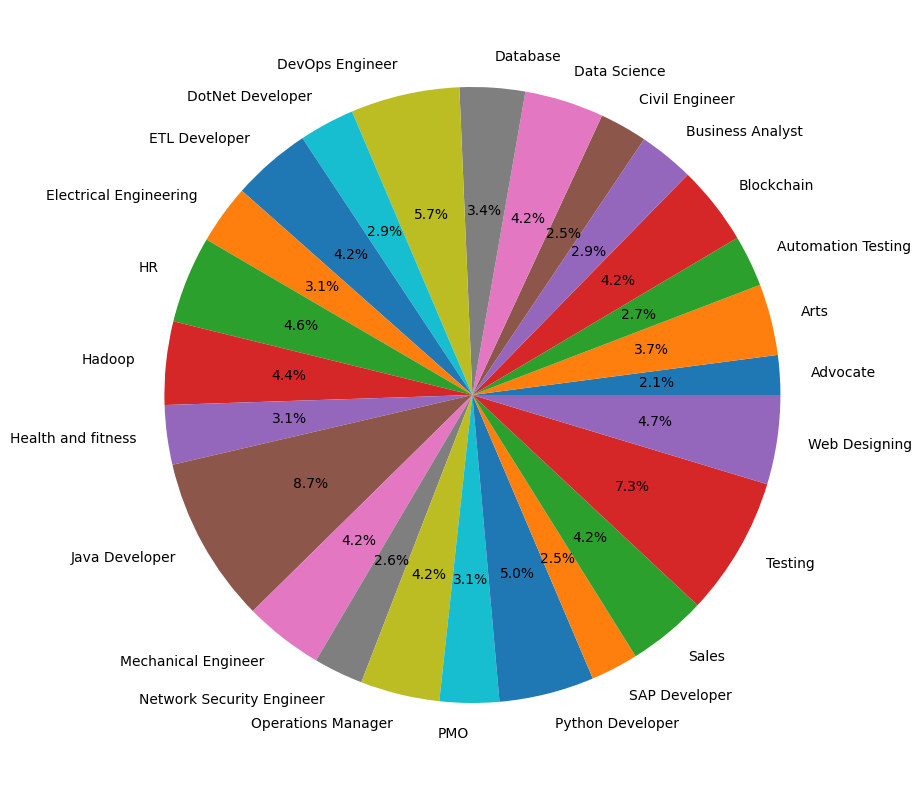

In [60]:
# pie chart
count=df["Category"].value_counts().sort_index()
labels=df["Category"].unique()
labels.sort()

plt.figure(figsize=(10,10))
plt.pie(count,labels=labels,autopct="%1.1f%%")
plt.show()

# cleaning the dataset

In [61]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [62]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [63]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [64]:
for i in df["Resume"]:
    if re.findall("http",i):
        print(i)
        break

Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details 
January 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering
October 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board
    College Magazine OCEAN
Web Designer 

Web Designer - Trust Systems and Software
Skill Details 
PHOTOSHOP- Exprience - 28 months
BOOTSTRAP- Exprience - 6 months
HTML5- Exprience - 6 months
JAVASCRIPT- Exprience - 6 months
CSS3- Exprience - Less than 1 year months
Angular 4- Exprience - Less than 1 year monthsCompany Details 
company - Trust Systems and Software
description - Projects worked on:
1. TrustBank-CBS
Project Description: TrustBank-CBS is a core banking solution by Trust Systems.
Roles and Responsibility:
â Renovated complete UI to make it more modern, user-friendly, maintainable and optimised for bank use.
â Shared the UI structu

In [65]:
def cleaning(x):
    text=x.lower()
    text=re.sub("(www|http:|https:)+[^\s]+[\w]"," ",text)
    text=re.sub("[^a-z0-9]"," ",text)
    text=[word for word in text.split() if word not in stopwords.words("english")]
    return " ".join(text)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aswin\AppData\Local\Temp\ipykernel_11684\935575050.py:3: SyntaxWarning: invalid escape sequence '\s'
  text=re.sub("(www|http:|https:)+[^\s]+[\w]"," ",text)


In [66]:
df["Resume"]=df["Resume"].apply(lambda x: cleaning(x))

In [67]:
for i in df["Resume"]:
    if re.findall("www",i):
        print(i)
        break

In [68]:
df["Resume"][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run a

In [69]:
# Lemmatization
def lemmatization(x):
    return " ".join([lem.lemmatize(word,pos="v") for word in x.split()])

In [70]:
df["Resume"]=df["Resume"].apply(lambda x:lemmatization(x))

In [71]:
df["Resume"][0]

'skills program languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learn regression svm na bay knn random forest decision tree boost techniques cluster analysis word embed sentiment analysis natural language process dimensionality reduction topic model lda nmf pca neural net database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understand deep learn education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany detail company ernst young llp description fraud investigations dispute service assurance technology assist review tar technology assist review assist accelerate review process run analytics generate report core member team 

## operations on output column

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
y=le.fit_transform(df["Category"])

In [74]:
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

# splitting the dataset

In [75]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(df["Resume"],y,test_size=0.2,random_state=42)

In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((769,), (193,), (769,), (193,))

# converting words to vectors

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [78]:
x_train_scaled=tfidf.fit_transform(x_train).toarray()
x_test_scaled=tfidf.transform(x_test).toarray()

In [79]:
x_train_scaled

array([[0.05470296, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01798444, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# model training

In [80]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [81]:
model.fit(x_train_scaled,y_train)

GaussianNB()

In [82]:
y_pred=model.predict(x_test_scaled)

In [83]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20,  7,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [84]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [85]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9948186528497409
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       0.89      1.00      0.94         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
        

<Axes: >

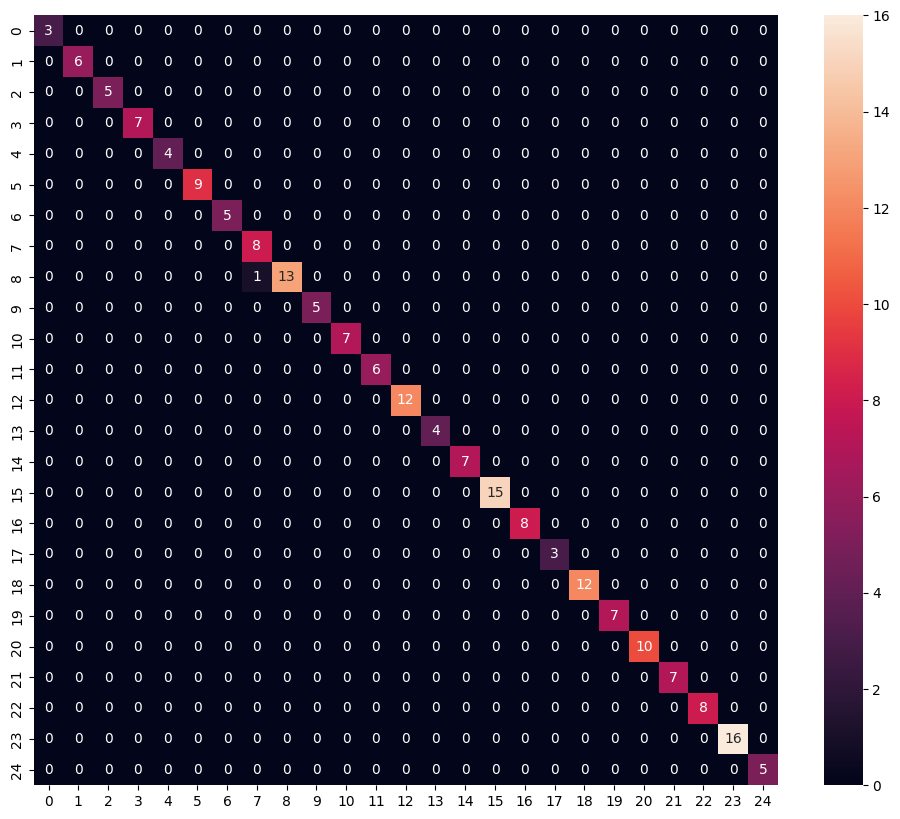

In [86]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# Testing

In [87]:
resume="""Education Details 
January 2016 B.E Information Technology Pune, Maharashtra Sawitribai Phule Pune University
Java Developer 
Education Details 
 BE IT   pjlce
Java Developer 

Java Developer
Skill Details 
c++- Exprience - Less than 1 year months
c- Exprience - Less than 1 year months
JAVA- Exprience - Less than 1 year months
DS- Exprience - Less than 1 year months
Jdbc- Exprience - 24 months
Hibernate- Exprience - Less than 1 year months
Java J2Ee- Exprience - Less than 1 year months
Javascript- Exprience - 6 months
JQuery- Exprience - 6 months
Ajax- Exprience - 6 monthsCompany Details 
company - Almighty tech pvt ltd nagpur
description - 1. As a Java Developer.
├ó┬Ø┬û ORGANISATION: Almighty tech pvt ltd Nagpur
├ó┬Ø┬û DESIGNATION.: Java Developer.
├ó┬Ø┬û DURATION.: From 1st jan 2018
├ó┬Ø┬û Notice Period: 15 days
JOB RESPONSIBILITIES
├ó┬Ø┬û Resolve Bugs
├ó┬Ø┬û Develop project as per user requirement.

KNOWLEDGE ABOUT:-
├ó┬Ø┬û Programming language C, C++, DS, Java(Swing, JDBC, J2EE) java script,jquery,Ajax
├ó┬Ø┬û Ms office, Excel."""

In [88]:
text=cleaning(resume)

In [90]:
text=lemmatization(text)

In [94]:
arr=tfidf.transform([text]).toarray()

In [101]:
le.classes_[model.predict(arr)[0]]

'Java Developer'

# Saving the models

In [102]:
import pickle

In [104]:
with open("model.pkl","wb") as f:
    pickle.dump(model,f)

In [105]:
with open("tfidf.pkl","wb") as f:
    pickle.dump(tfidf,f)